# Capstone 2: Exploratory Data Analysis

## 1. Sourcing and loading

### 1a. Import relevant libraries

In [4]:
#Import libraries
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm #This is a python module which provides classes and functions for the estimation of different statistical models, conducting statistical tests, and statistical EDA.
from statsmodels.graphics.api import abline_plot # For visualizing evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score #The mean_squared error is the average squared difference between the estimated values and true value. The r2_score is used to determine how the variability of one factor can be caused by its relationship to another related factor.
from sklearn.model_selection import train_test_split # To split the data.
from sklearn import linear_model, preprocessing # The linear model is the ordinary least squares linear regression model. Preprocessing helps to standardize a data set. If some outliers are present in the set, robust scalers or transformers are more appropriate.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
import os
from library.sb_utils import save_file

C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### 1b. Load the data

In [5]:
#Load the CSV data from the data wrangling
data_all_0 = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/data_all_0.csv')
data_no_nan = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/data_no_nan.csv')

###  1c. Explore the data

In [6]:
data_all_0.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
0,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1.0,24924.50,151315,0,0
1,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2.0,50605.27,151315,0,0
2,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3.0,13740.12,151315,0,0
3,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4.0,39954.04,151315,0,0
4,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5.0,32229.38,151315,0,0


In [7]:
data_all_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  int64  
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     421570 non-null  float64
 5   MarkDown2     421570 non-null  float64
 6   MarkDown3     421570 non-null  float64
 7   MarkDown4     421570 non-null  float64
 8   MarkDown5     421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  int64  
 12  Dept          421570 non-null  float64
 13  Weekly_Sales  421570 non-null  float64
 14  Size          421570 non-null  int64  
 15  Type_B        421570 non-null  int64  
 16  Type_C        421570 non-null  int64  
dtypes: float64(11), int64(6)
memory usage: 54.7 MB


In [8]:
data_all_0.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,734307.233238,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.070358,44.260317,15981.258123,136727.915739,0.387824,0.101044
std,12.785297,294.749986,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.255750,30.492054,22711.183519,60980.583328,0.487255,0.301387
min,1.000000,733782.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,1.000000,-4988.940000,34875.000000,0.000000,0.000000
25%,11.000000,734057.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,18.000000,2079.650000,93638.000000,0.000000,0.000000
50%,22.000000,734305.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,37.000000,7612.030000,140167.000000,0.000000,0.000000
75%,33.000000,734564.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,0.000000,74.000000,20205.852500,202505.000000,1.000000,0.000000
max,45.000000,734847.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,1.000000,99.000000,693099.360000,219622.000000,1.000000,1.000000


In [9]:
data_no_nan.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
0,1,733894,42.31,2.572,211.096358,8.106,0,1.0,24924.50,151315,0,0
1,1,733894,42.31,2.572,211.096358,8.106,0,2.0,50605.27,151315,0,0
2,1,733894,42.31,2.572,211.096358,8.106,0,3.0,13740.12,151315,0,0
3,1,733894,42.31,2.572,211.096358,8.106,0,4.0,39954.04,151315,0,0
4,1,733894,42.31,2.572,211.096358,8.106,0,5.0,32229.38,151315,0,0


In [10]:
data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  int64  
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   CPI           421570 non-null  float64
 5   Unemployment  421570 non-null  float64
 6   IsHoliday     421570 non-null  int64  
 7   Dept          421570 non-null  float64
 8   Weekly_Sales  421570 non-null  float64
 9   Size          421570 non-null  int64  
 10  Type_B        421570 non-null  int64  
 11  Type_C        421570 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 38.6 MB


In [11]:
data_no_nan.describe()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,734307.233238,60.090059,3.361027,171.201947,7.960289,0.070358,44.260317,15981.258123,136727.915739,0.387824,0.101044
std,12.785297,294.749986,18.447931,0.458515,39.159276,1.863296,0.255750,30.492054,22711.183519,60980.583328,0.487255,0.301387
min,1.000000,733782.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,-4988.940000,34875.000000,0.000000,0.000000
25%,11.000000,734057.000000,46.680000,2.933000,132.022667,6.891000,0.000000,18.000000,2079.650000,93638.000000,0.000000,0.000000
50%,22.000000,734305.000000,62.090000,3.452000,182.318780,7.866000,0.000000,37.000000,7612.030000,140167.000000,0.000000,0.000000
75%,33.000000,734564.000000,74.280000,3.738000,212.416993,8.572000,0.000000,74.000000,20205.852500,202505.000000,1.000000,0.000000
max,45.000000,734847.000000,100.140000,4.468000,227.232807,14.313000,1.000000,99.000000,693099.360000,219622.000000,1.000000,1.000000


## 2. Cleaning, Transforming, and Visualizing

## 2a. Visualizing correlations

### Plot histograms of each dataframe and line plots

Since the data between the two dataframes is exactly the same except for the MarkDown columns, I will only show histograms, line, and scatter plots for the data frame where I filled in NaN values for the MarkDown columns with 0.

<AxesSubplot:xlabel='Store', ylabel='Count'>

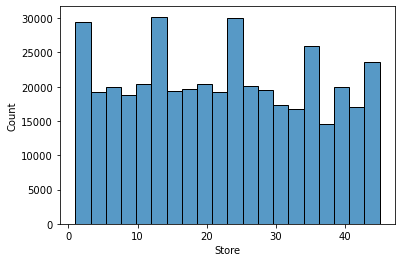

In [19]:
sns.histplot(data=data_all_0, x='Store', bins=20)

<AxesSubplot:xlabel='Date', ylabel='Count'>

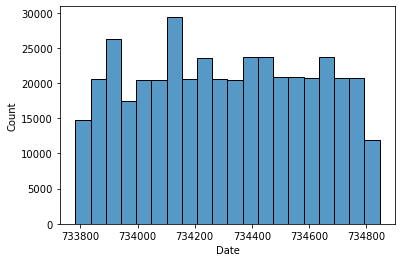

In [20]:
sns.histplot(data=data_all_0, x='Date', bins=20)

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

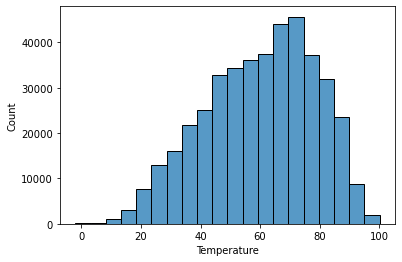

In [21]:
sns.histplot(data=data_all_0, x='Temperature', bins=20)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Count'>

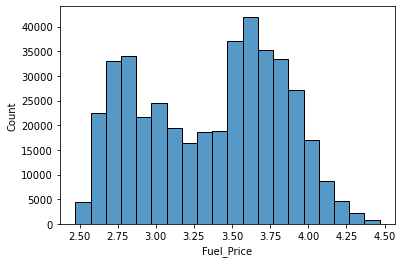

In [22]:
sns.histplot(data=data_all_0, x='Fuel_Price', bins=20)

<AxesSubplot:xlabel='CPI', ylabel='Count'>

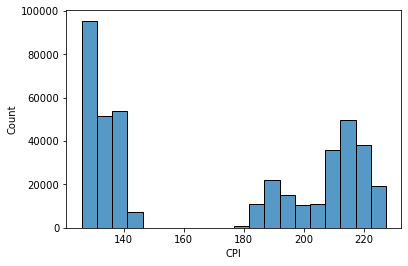

In [23]:
sns.histplot(data=data_all_0, x='CPI', bins=20)

<AxesSubplot:xlabel='Unemployment', ylabel='Count'>

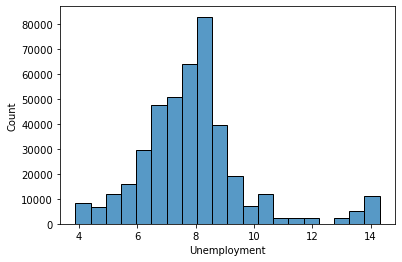

In [24]:
sns.histplot(data=data_all_0, x='Unemployment', bins=20)

<AxesSubplot:xlabel='IsHoliday', ylabel='Count'>

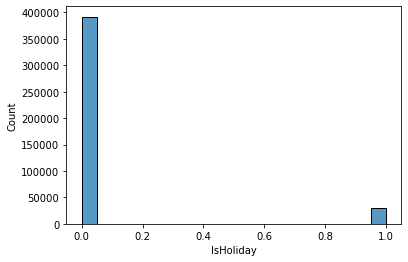

In [26]:
sns.histplot(data=data_all_0, x='IsHoliday', bins=20)

<AxesSubplot:xlabel='Dept', ylabel='Count'>

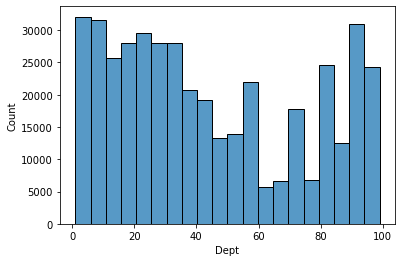

In [27]:
sns.histplot(data=data_all_0, x='Dept', bins=20)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Count'>

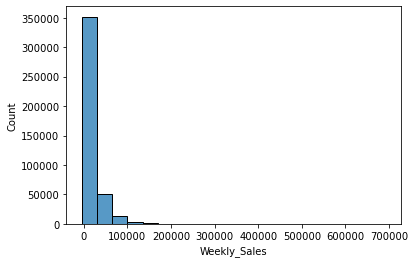

In [28]:
sns.histplot(data=data_all_0, x='Weekly_Sales', bins=20)

<AxesSubplot:xlabel='Size', ylabel='Count'>

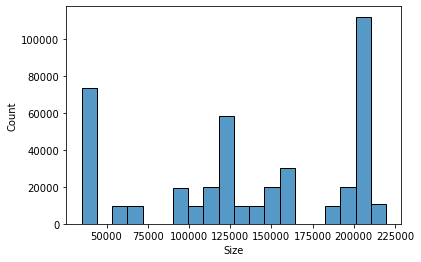

In [29]:
sns.histplot(data=data_all_0, x='Size', bins=20)

<AxesSubplot:xlabel='MarkDown1', ylabel='Count'>

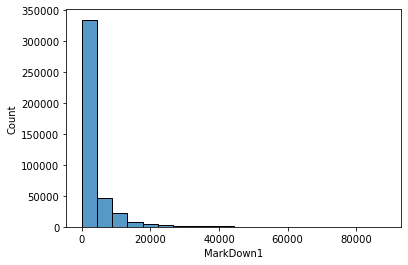

In [30]:
sns.histplot(data=data_all_0, x='MarkDown1', bins=20)

<AxesSubplot:xlabel='MarkDown2', ylabel='Count'>

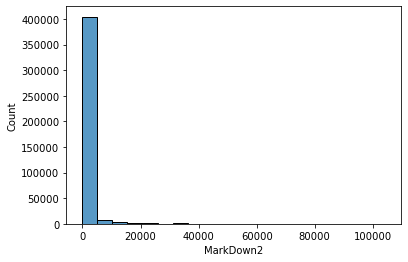

In [31]:
sns.histplot(data=data_all_0, x='MarkDown2', bins=20)

<AxesSubplot:xlabel='MarkDown3', ylabel='Count'>

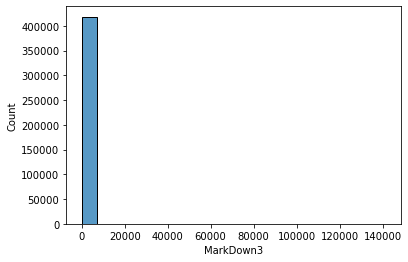

In [32]:
sns.histplot(data=data_all_0, x='MarkDown3', bins=20)

<AxesSubplot:xlabel='MarkDown4', ylabel='Count'>

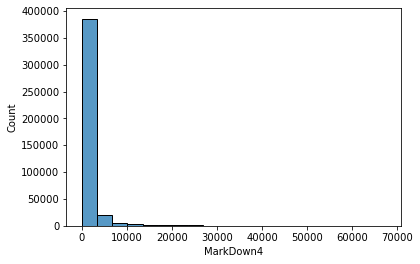

In [33]:
sns.histplot(data=data_all_0, x='MarkDown4', bins=20)

<AxesSubplot:xlabel='MarkDown5', ylabel='Count'>

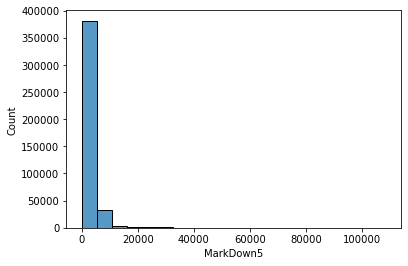

In [34]:
sns.histplot(data=data_all_0, x='MarkDown5', bins=20)

<AxesSubplot:xlabel='Type_B', ylabel='Count'>

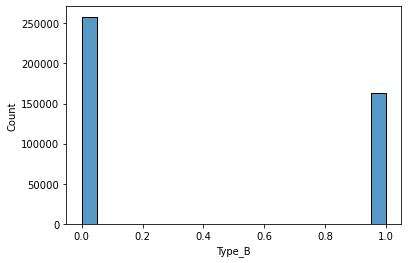

In [35]:
sns.histplot(data=data_all_0, x='Type_B', bins=20)

<AxesSubplot:xlabel='Type_C', ylabel='Count'>

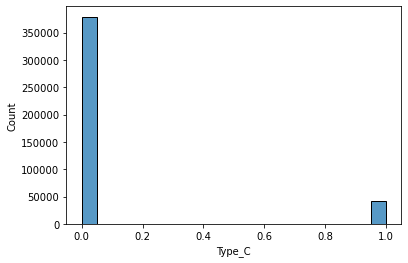

In [36]:
sns.histplot(data=data_all_0, x='Type_C', bins=20)

Before displaying the heat maps of possible correlations, I will explore a few of the variables with respect to weekly sales.

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

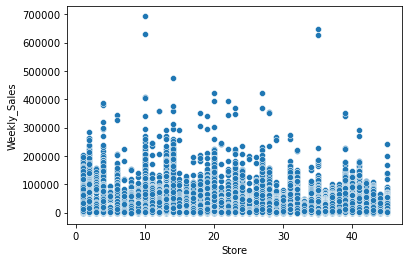

In [38]:
sns.scatterplot(data=data_all_0, x="Store", y="Weekly_Sales")

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

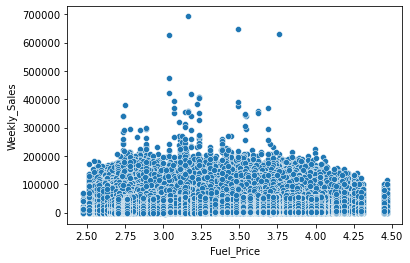

In [40]:
sns.scatterplot(data=data_all_0, x="Fuel_Price", y="Weekly_Sales")

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

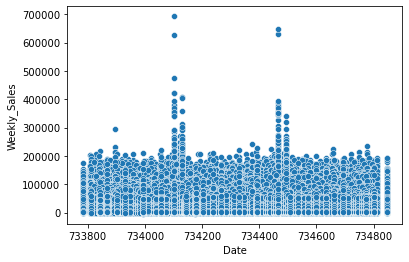

In [41]:
sns.scatterplot(data=data_all_0, x="Date", y="Weekly_Sales")

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

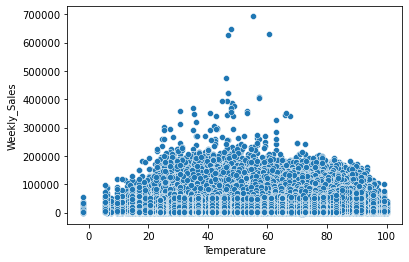

In [42]:
sns.scatterplot(data=data_all_0, x="Temperature", y="Weekly_Sales")

<AxesSubplot:xlabel='MarkDown1', ylabel='Weekly_Sales'>

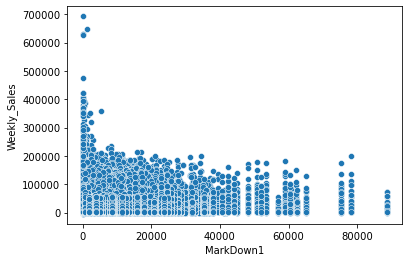

In [43]:
sns.scatterplot(data=data_all_0, x="MarkDown1", y="Weekly_Sales")

<AxesSubplot:xlabel='MarkDown2', ylabel='Weekly_Sales'>

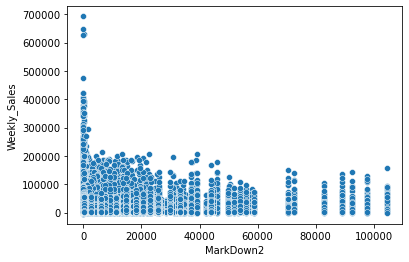

In [44]:
sns.scatterplot(data=data_all_0, x="MarkDown2", y="Weekly_Sales")

<AxesSubplot:xlabel='MarkDown3', ylabel='Weekly_Sales'>

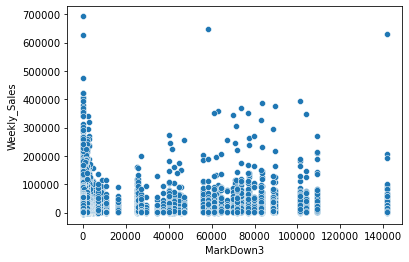

In [45]:
sns.scatterplot(data=data_all_0, x="MarkDown3", y="Weekly_Sales")

<AxesSubplot:xlabel='MarkDown4', ylabel='Weekly_Sales'>

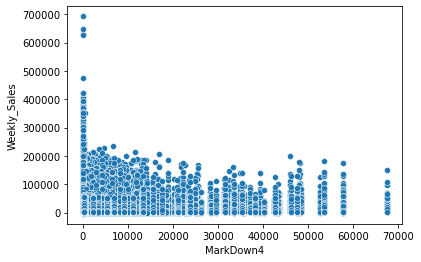

In [46]:
sns.scatterplot(data=data_all_0, x="MarkDown4", y="Weekly_Sales")

<AxesSubplot:xlabel='MarkDown5', ylabel='Weekly_Sales'>

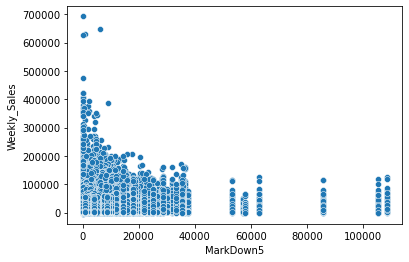

In [47]:
sns.scatterplot(data=data_all_0, x="MarkDown5", y="Weekly_Sales")

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

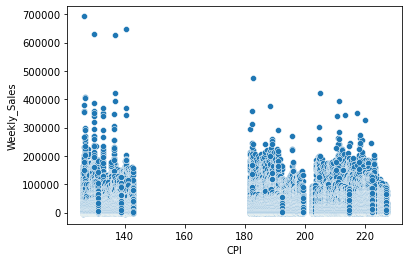

In [48]:
sns.scatterplot(data=data_all_0, x="CPI", y="Weekly_Sales")

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

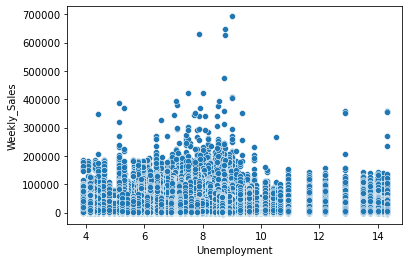

In [49]:
sns.scatterplot(data=data_all_0, x="Unemployment", y="Weekly_Sales")

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

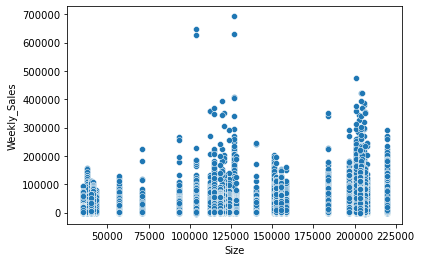

In [50]:
sns.scatterplot(data=data_all_0, x="Size", y="Weekly_Sales")

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

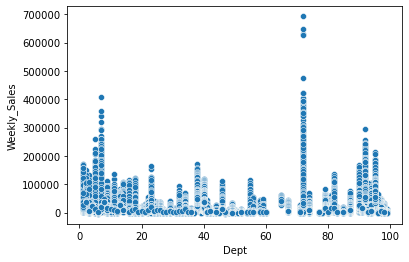

In [51]:
sns.scatterplot(data=data_all_0, x="Dept", y="Weekly_Sales")

In [25]:
#Make two new dataframes with one being for holidays and the other regular days.
data_no_nan_noholiday = data_no_nan.loc[data_no_nan['IsHoliday'] == 0]
data_no_nan_isholiday = data_no_nan.loc[data_no_nan['IsHoliday'] == 1]

<AxesSubplot:>

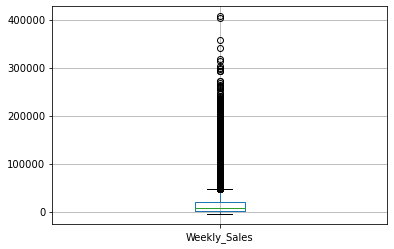

In [31]:
#Box plots showing weekly sales on normal days versus weekly sales on holidays.
data_no_nan_noholiday.boxplot(column='Weekly_Sales')

<AxesSubplot:>

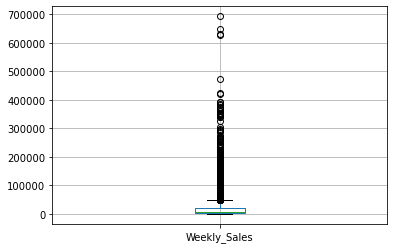

In [27]:
data_no_nan_isholiday.boxplot(column='Weekly_Sales')

In [35]:
#Make new dataframes where we use data from only stores types A, B, or C.
data_no_nan_storeA = data_no_nan.loc[(data_no_nan['Type_B'] == 0) & (data_no_nan['Type_C'] == 0)]
data_no_nan_storeB = data_no_nan.loc[data_no_nan['Type_B'] == 1]
data_no_nan_storeC = data_no_nan.loc[data_no_nan['Type_C'] == 1]

<AxesSubplot:>

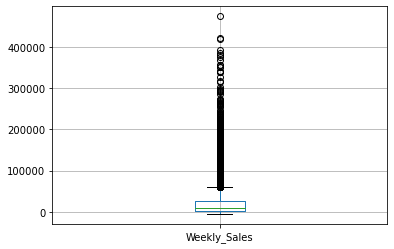

In [36]:
#Box plots showing weekly sales for A, B, and C type stores.
#Type A Stores
data_no_nan_storeA.boxplot(column='Weekly_Sales')

<AxesSubplot:>

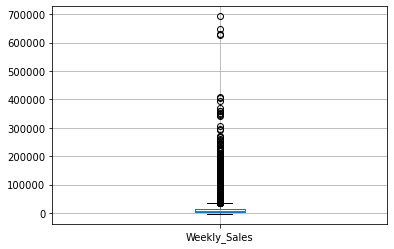

In [37]:
#Type B Stores
data_no_nan_storeB.boxplot(column='Weekly_Sales')

<AxesSubplot:>

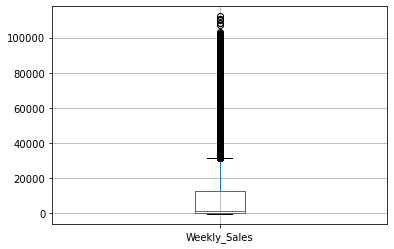

In [38]:
#Type C Stores
data_no_nan_storeC.boxplot(column='Weekly_Sales')

As can be seen from the above charts, line plots of discrete vs continuous variables displayed the data with some ambiguity. I switched to showing scatter plots and box plots for these values to better understand how the data responds. Fuel price did have some interesting response to the date, with it mainly rising over time as one would expect. There were also a few departments that did well in terms of weekly sales, with the majority being relatively similar. The box plots for weekly sales versus holiday or no holiday did seem to show higher outliers during holidays, but the actually body of the box plot was relativley the same for both conditions. One could argue that there were more higher sales made on holidays, but again they are designated as outliers. Sales versus fuel price didn't seem to show any meaningful correlation. Store type also seemed relatively similar in sales expect for the outliers. Stores A and B had much higher and more frequent outliers. These may need to be compared directly to see which store type actually sells better or if they are equal.

###  Plot the Correlation Matrix Heatmaps

I've removed all the categorical variables for the correlation matrix heatmaps

In [17]:
data_0_cont = data_all_0.drop(columns=['Store', 'Date', 'IsHoliday', 'Dept', 'Type_B', 'Type_C'])

In [18]:
data_0_cont.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Size
0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50,151315
1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,50605.27,151315
2,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13740.12,151315
3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,39954.04,151315
4,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,32229.38,151315


In [20]:
data_nan_cont = data_no_nan.drop(columns=['Store', 'Date', 'IsHoliday', 'Dept', 'Type_B', 'Type_C'])

In [21]:
data_nan_cont.head()

,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Size
0,42.31,2.572,211.096358,8.106,24924.50,151315
1,42.31,2.572,211.096358,8.106,50605.27,151315
2,42.31,2.572,211.096358,8.106,13740.12,151315
3,42.31,2.572,211.096358,8.106,39954.04,151315
4,42.31,2.572,211.096358,8.106,32229.38,151315


Correlation between various features all 0


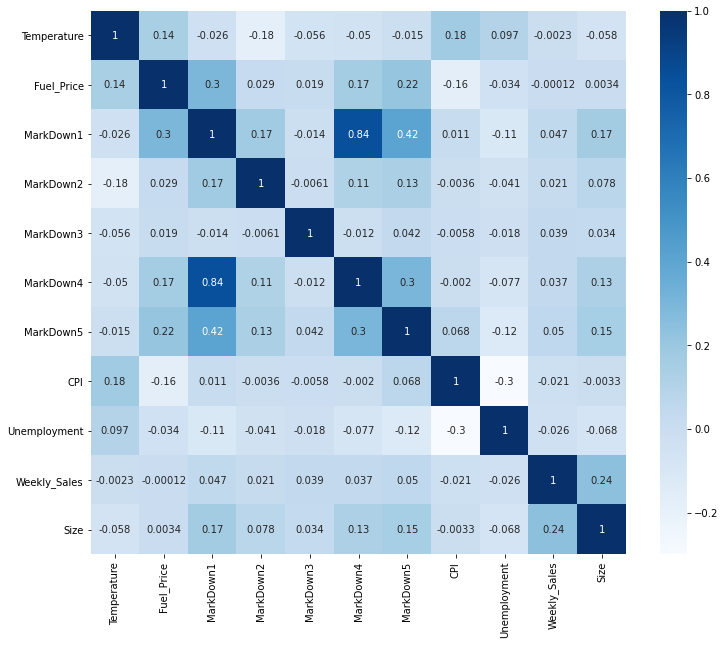

In [19]:
plt.figure(figsize=(12,10))
print('Correlation between various features all 0')
p=sns.heatmap(data_0_cont.corr(), annot=True,cmap ='Blues')

Correlation between various features no NaN


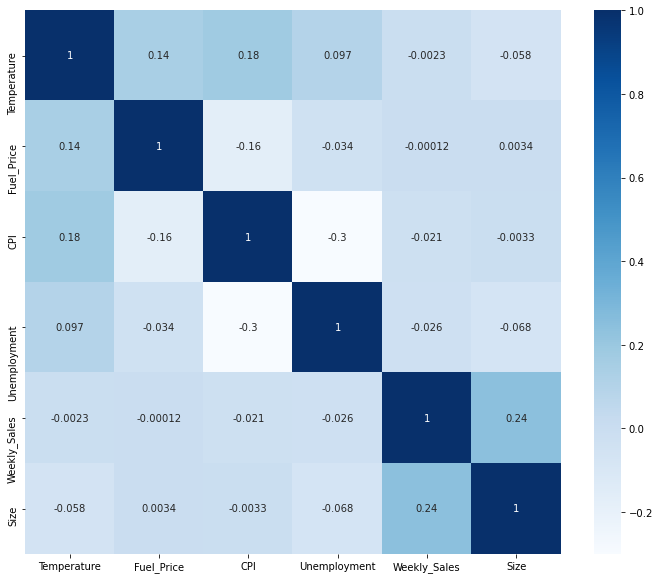

In [22]:
plt.figure(figsize=(12,10))
print('Correlation between various features no NaN')
p=sns.heatmap(data_nan_cont.corr(), annot=True,cmap ='Blues')

There seems to be a few interesting correlations occuring as shown on the heat map. We are interested in correlations with weekly sales, which seems to show positive correlations with the size of the store, and negative correlations with the other features. All types of markdowns seemed to positively correlate with price, although the correlation was very small and may be negligible.